In [1]:
# erase blanks from audios => short audio with only speech

import librosa
import numpy as np
import os
import sys
import argparse
import soundfile as sf
from tqdm import tqdm
from pydub import AudioSegment
from pydub.silence import split_on_silence

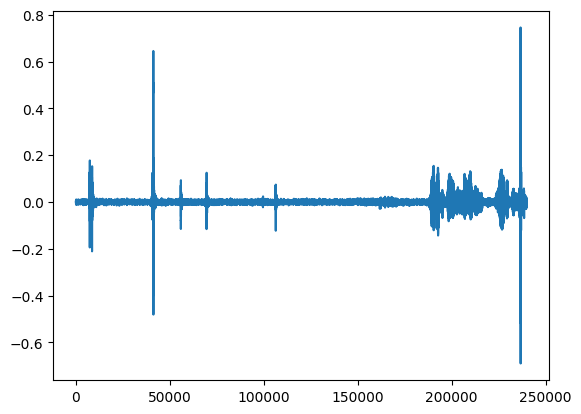

In [6]:
load_audio = lambda x: librosa.load(x, sr=16000)[0]

audio = load_audio('test.wav')

# display audio
def display_audio(audio):
    import matplotlib.pyplot as plt
    plt.plot(audio)
    plt.show()

display_audio(audio)

[[  6656  10240]
 [ 39936  43008]
 [ 55296  57344]
 [ 68608  71168]
 [105472 107520]
 [188416 196096]
 [197120 217088]
 [223744 230912]
 [231936 239616]]


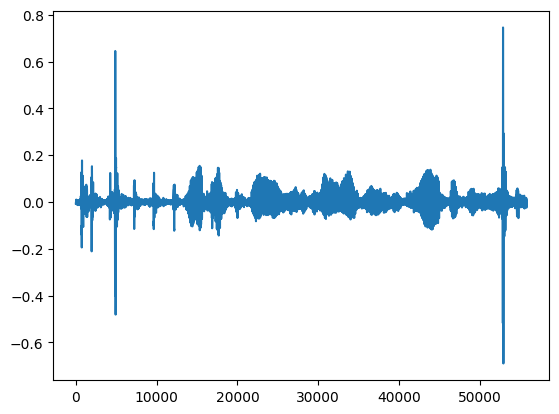

In [21]:
intervals = librosa.effects.split(audio, top_db=20)
print(intervals)

restore = np.concatenate([audio[start:end] for start, end in intervals])
display_audio(restore)

# save audio
sf.write('restore.wav', restore, 16000)